In [3]:
import pandas as pd


merged_df = pd.read_csv('merged_data_w_coord.csv')

In [4]:
merged_df

,Unnamed: 0,Country of Giftor,Institution Name,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,...,Functioning of government,Political participation,Political culture,Civil liberties,Regime type,Region,Country Latitude,Country Longitude,School Latitude,School Longitude
0,0,Afghanistan,Ball State University,830,178600,Muncie,IN,2013-08-28,3000000,Contract,...,0.64,3.89,2.50,3.82,Authoritarian,Asia & Australasia,33.768006,66.238514,38.958058,-95.247750
1,654,Brazil,Ball State University,6491,178600,Muncie,IN,2014-08-18,264041,Contract,...,5.36,6.11,5.00,8.24,Flawed democracy,Latin America,-10.333333,-53.200000,38.958058,-95.247750
2,3097,China,Ball State University,201,178600,Muncie,IN,2014-08-18,7184164,Contract,...,4.29,3.33,2.50,1.18,Authoritarian,Asia & Australasia,35.000074,104.999927,38.958058,-95.247750
3,3098,China,Ball State University,367,178600,Muncie,IN,2017-08-21,4218639,Contract,...,4.29,3.33,2.50,1.18,Authoritarian,Asia & Australasia,35.000074,104.999927,38.958058,-95.247750
4,3099,China,Ball State University,965,178600,Muncie,IN,2018-01-08,1782825,Contract,...,4.29,3.33,2.50,1.18,Authoritarian,Asia & Australasia,35.000074,104.999927,38.958058,-95.247750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21047,18516,Switzerland,Hult International Business School,64,4143200,Cambridge,MA,2012-10-01,21532410,Contract,...,9.29,7.78,9.38,9.12,Full democracy,Western Europe,46.798562,8.231974,42.369985,-71.070640
21048,19790,Taiwan,Mount Holyoke College,9615,219200,South Hadley,MA,2013-08-27,300000,Monetary Gift,...,8.21,6.11,5.63,9.12,Flawed democracy,Asia & Australasia,23.598298,120.835363,38.635284,-90.231677
21049,20120,Thailand,Saint Louis University,12123,250600,Saint Louis,MO,2013-05-09,250000,Monetary Gift,...,5.36,6.11,6.25,6.47,Flawed democracy,Asia & Australasia,14.897192,100.832730,33.414809,-112.010831
21050,20121,Thailand,Saint Louis University,12133,250600,Saint Louis,MO,2013-05-09,250000,Monetary Gift,...,5.36,6.11,6.25,6.47,Flawed democracy,Asia & Australasia,14.897192,100.832730,33.414809,-112.010831


In [5]:
import matplotlib.pyplot as plt
import mplleaflet
from IPython.display import IFrame    


x = merged_df['School Longitude'].unique().tolist()
y = merged_df['School Latitude'].unique().tolist()
n = merged_df['Institution Name'].unique().tolist()

fig = plt.figure(figsize=(8,8))
plt.scatter(x,
            y,
            color='blue', 
            alpha=0.7, 
            s=100,
           )
mplleaflet.save_html(fileobj='school_map.html')
IFrame('school_map.html', width=800, height=650)

In [6]:
x = merged_df['Country Longitude'].unique().tolist()
y = merged_df['Country Latitude'].unique().tolist()
n = merged_df['Country of Giftor'].unique().tolist()

fig = plt.figure(figsize=(8,8))
plt.scatter(x,
            y,
            color='blue', 
            alpha=0.7, 
            s=100,
           )
mplleaflet.save_html(fileobj='country_map.html')
IFrame('country_map.html', width=550, height=450)

In [7]:
import geopandas
import geoplot
import mapclassify


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
counts = merged_df.groupby(['Country to merge on']).count()['ID']

world['name'].sort_values()

103    Afghanistan
125        Albania
82         Algeria
74          Angola
159     Antarctica
          ...     
2        W. Sahara
157          Yemen
70          Zambia
48        Zimbabwe
73        eSwatini
Name: name, Length: 177, dtype: object

In [8]:
merged_world = pd.merge(world, counts.reset_index(), left_on='name', right_on='Country to merge on', how='outer')
merged_world[merged_world['name'].isnull()]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country to merge on,ID
177,NaN,NaN,NaN,NaN,NaN,None,Bahrain,11.0
178,NaN,NaN,NaN,NaN,NaN,None,Bosnia and Herzegovina,4.0
179,NaN,NaN,NaN,NaN,NaN,None,Czech Republic,10.0
180,NaN,NaN,NaN,NaN,NaN,None,Dominican Republic,3.0
181,NaN,NaN,NaN,NaN,NaN,None,Hong Kong,806.0
182,NaN,NaN,NaN,NaN,NaN,None,Malta,5.0
183,NaN,NaN,NaN,NaN,NaN,None,Mauritius,2.0
184,NaN,NaN,NaN,NaN,NaN,None,Not Rated,264.0
185,NaN,NaN,NaN,NaN,NaN,None,Singapore,300.0
186,NaN,NaN,NaN,NaN,NaN,None,United States,27.0


In [9]:
name_dict = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
             'Czechia': 'Czech Republic',
             'Dominican Rep.': 'Dominican Republic',
             'Mauritania': 'Mauritius',
             'United States of America': 'United States'}

In [10]:
new_world = world.replace(name_dict)

In [11]:
new_merged_world = pd.merge(new_world, counts.reset_index(), left_on='name', right_on='Country to merge on', how='outer')
new_merged_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country to merge on,ID
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,31.0
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2076.0
4,326625791.0,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,27.0
...,...,...,...,...,...,...,...,...
177,NaN,NaN,NaN,NaN,NaN,None,Bahrain,11.0
178,NaN,NaN,NaN,NaN,NaN,None,Hong Kong,806.0
179,NaN,NaN,NaN,NaN,NaN,None,Malta,5.0
180,NaN,NaN,NaN,NaN,NaN,None,Not Rated,264.0


In [50]:
hacked_world = new_merged_world[~new_merged_world['pop_est'].isna()].copy()
hacked_world['ID'] = hacked_world['ID'].fillna(0).copy()
hacked_world.loc[hacked_world['Country to merge on'].isna(), 'Country to merge on'] = hacked_world.loc[hacked_world['Country to merge on'].isna(), 'name']
hacked_world
# hacked_world['ID'].hist()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country to merge on,ID
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,0.0
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,31.0
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,0.0
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2076.0
4,326625791.0,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,27.0
...,...,...,...,...,...,...,...,...
172,7111024.0,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,4.0
173,642550.0,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,0.0
174,1895250.0,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,0.0
175,1218208.0,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,9.0


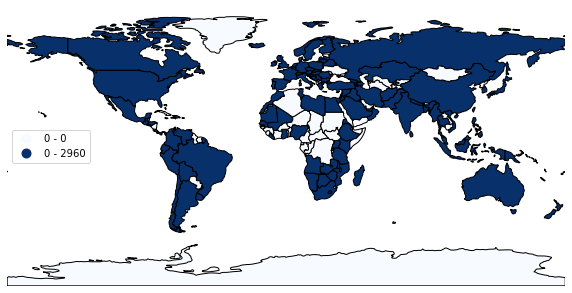

In [51]:
scheme = mapclassify.UserDefined(hacked_world['ID'], bins=[0,2960])
geoplot.choropleth(hacked_world,
                   hue=hacked_world['ID'],
                   scheme=scheme,
                   cmap='Blues',
                   figsize=(10, 8),
                   legend=True)


In [57]:
shapes_df = hacked_world[['Country to merge on', 'geometry', 'ID']].rename({'ID': 'Country donation counts'}, axis=1)
shapes_df.to_csv('country_shapes.csv')

In [56]:
shapes_df

,Country to merge on,geometry,Country donation counts
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.0
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",31.0
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2076.0
4,United States,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",27.0
...,...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",4.0
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.0
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.0
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",9.0
